# 介绍

在XYZ公司初创阶段，数据管理尚处于初级阶段，所有信息均以JSON文件形式存储。此时，公司面临扩张的机遇，若扩张成功，早期员工的股权将可能带来丰厚的回报。在这一关键时刻，公司的首席执行官提出了一系列重要问题，涉及用户分布、用户参与度、早期采用者以及产品功能的改进。具体问题包括：1) 识别用户数量最多和最少的州；2) 分析各州的用户参与度；3) 找出每个州最早注册的用户；4) 开发一种基础的歌曲推荐功能；5) 设计测试方法来验证推荐模型的有效性。

面对这些问题，深入分析现有数据并提供见解和解决方案的任务至关重要。这不仅要求具备数据分析能力，还需要创新思考，为公司的成长战略提供有价值的建议。这一挑战将考验分析技能、创造力和战略思维，同时也为早期员工提供了在潜力巨大的初创公司中发挥关键作用的机会。

# 导入数据集

导入常用的库：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

接着导入数据集：

In [2]:
song_data = pd.read_json("./../dataset/08. song.json")

In [3]:
song_data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


# 数据处理

查看一下数据集的信息：

In [4]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 4000 non-null   object
 1   user_id            4000 non-null   int64 
 2   user_state         4000 non-null   object
 3   user_sign_up_date  4000 non-null   object
 4   song_played        4000 non-null   object
 5   time_played        4000 non-null   object
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


可以认为数据集一共有4000个，并没有哪个特征变量存在着缺失值，一些特征变量需要进行类型转换。

In [5]:
# 将'user_sign_up_date'转换为日期格式
song_data['user_sign_up_date'] = pd.to_datetime(song_data['user_sign_up_date'])

# 将'time_played'转换为日期时间格式
song_data['time_played'] = pd.to_datetime(song_data['time_played'])

# 数据探索

In [6]:
song_data.describe(include='all')

,id,user_id,user_state,user_sign_up_date,song_played,time_played
count,4000,4000.000000,4000,4000,4000,4000
unique,4000,NaN,41,NaN,97,NaN
top,GOQMMKSQQH,NaN,New York,NaN,Come Together,NaN
freq,1,NaN,469,NaN,408,NaN
mean,NaN,101.574000,NaN,2015-05-11 17:06:00,NaN,2015-06-15 00:48:44.929500160
min,NaN,1.000000,NaN,2015-05-01 00:00:00,NaN,2015-06-01 05:02:54
25%,NaN,48.000000,NaN,2015-05-06 00:00:00,NaN,2015-06-07 20:02:02
50%,NaN,102.000000,NaN,2015-05-12 00:00:00,NaN,2015-06-14 20:04:12.500000
75%,NaN,155.000000,NaN,2015-05-19 00:00:00,NaN,2015-06-21 21:36:30.249999872
max,NaN,200.000000,NaN,2015-05-20 00:00:00,NaN,2015-06-28 23:46:06


- 州 (user_state): 数据集中包含41个不同的州。
- 注册日期 (user_sign_up_date): 注册日期在2015年05月01日到2015年05月20日之间，共有20个不同的日期。
- 歌曲播放 (song_played): 总共有97首不同的歌曲被播放。
- 播放时间 (time_played): 时间戳显示有3997个唯一的播放时间，存在少量的重复时间戳。

In [7]:
unique_user_count = song_data['user_id'].nunique()
unique_user_count

196

数据集中user_id列只有196个唯一值意味着尽管总共有4000条记录，但这些记录只涉及196个不同的用户。这种情况通常表示有些用户在数据收集期间有多个互动或活动记录。例如，一个用户可能在不同的时间播放了多首歌曲，或者在不同的日子里进行了多次活动，每次活动都被记录在数据集中。

如果你的数据集包含如歌曲播放记录或用户登录信息等多次用户活动，这是很常见的。每个用户可能对应多条记录，但在统计唯一用户数量时，这些重复的用户ID会被计算为一个。这样可以更清楚地了解实际的用户基础大小，而不是单纯的活动数量。

# 州分布情况

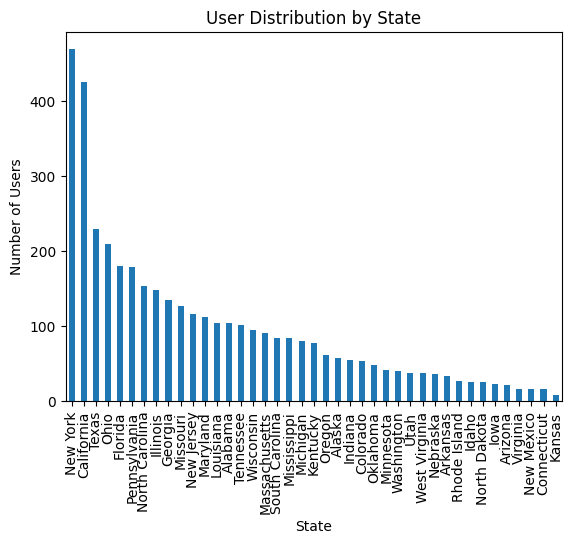

In [8]:
song_data['user_state'].value_counts().plot(kind='bar')
plt.title('User Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.show()

上述的可视化结果给出了数据集中每个州出现次数的柱状图，从可视化的结果来看，可以发现New York和Califomia两个州遥遥领先于其他的几个州。

但是这并不能够表明州用户数量信息，因为同一个用户可能多次登录使用以至于他的信息被记录下来了。

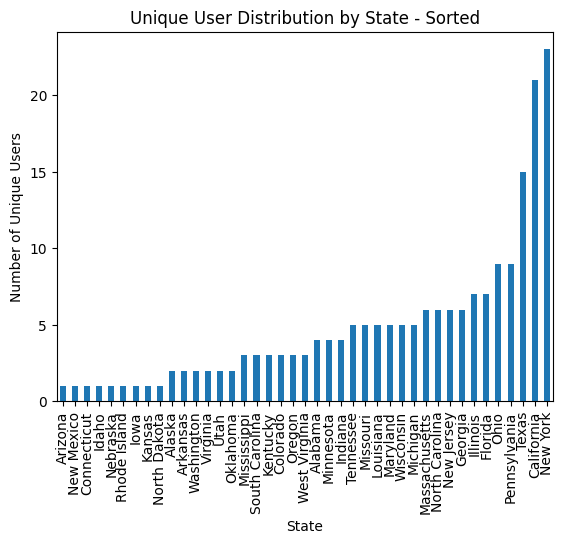

In [9]:
unique_users_per_state = song_data.groupby('user_state')['user_id'].nunique()

# 先按照唯一用户数排序
unique_users_per_state_sorted = unique_users_per_state.sort_values()

# 绘制排序后的条形图
unique_users_per_state_sorted.plot(kind='bar')
plt.title('Unique User Distribution by State - Sorted')
plt.xlabel('State')
plt.ylabel('Number of Unique Users')
plt.show()

可以发现用户数量最多的三个州为：New York，Califomia和Pennsylvania；反之，则是Arizona，New Mexico和Connecticut。

# 各州用户参与度

用户参与度指标定义

用户参与度是一个关键指标，用来衡量用户对产品或服务的活跃使用程度。在音乐播放平台的背景下，参与度可以通过以下几个维度来定义：

1. **播放次数**：用户播放歌曲的总次数，反映了用户活跃程度。
2. **播放的唯一歌曲数**：用户播放的不同歌曲的数量，可以反映用户对平台内容的探索性。
3. **活跃天数**：用户在平台上活跃的天数，从首次播放到最后播放的时间跨度。

计算方法

基于上述定义，我们可以构建一个综合指标，将这三个维度结合起来，以得到每个州的平均用户参与度。这个综合指标可以按以下步骤计算：

1. **计算每个用户的总播放次数**：
   $ \text{总播放次数} = \text{用户的歌曲播放记录数} $

2. **计算每个用户播放的唯一歌曲数**：
   $ \text{唯一歌曲数} = \text{用户播放的不同歌曲的数量} $

3. **计算每个用户的活跃天数**：
   $ \text{活跃天数} = \text{用户最后一次播放日期} - \text{用户首次播放日期} + 1 $

4. **计算每个用户的参与度得分**：
   $ \text{用户参与度} = \frac{\text{总播放次数} + \text{唯一歌曲数} + \text{活跃天数}}{3} $

5. **计算每个州的平均用户参与度**：
   $ \text{州平均参与度} = \frac{\text{该州所有用户参与度之和}}{\text{该州用户数}} $

为什么这是合理的

- **综合性**：此指标通过结合多个维度来衡量用户参与度，比单一指标更全面。
- **平衡性**：通过平均化多个维度，避免了某一方面过度影响结果的问题。
- **适应性**：适用于多种类型的平台，可以根据不同行业特点进行调整。

接下来，我将执行这些计算步骤，首先是生成每个用户的参与度得分，然后计算各州的平均参与度。

In [10]:
# Calculate engagement metrics
user_plays = song_data.groupby('user_id').size()
user_unique_songs = song_data.groupby('user_id')['song_played'].nunique()
user_first_play = song_data.groupby('user_id')['time_played'].min()
user_last_play = song_data.groupby('user_id')['time_played'].max()
user_active_days = (user_last_play - user_first_play).dt.days + 1

In [11]:
user_engagement = pd.DataFrame({
    'Total Plays': user_plays,
    'Unique Songs': user_unique_songs,
    'Active Days': user_active_days
})
user_engagement['Engagement Score'] = (user_engagement['Total Plays'] +
                                       user_engagement['Unique Songs'] +
                                       user_engagement['Active Days']) / 3

In [12]:
# Map each user's state to their user_id for averaging by state
user_state_map = song_data[['user_id', 'user_state']].drop_duplicates().set_index('user_id')
user_engagement = user_engagement.join(user_state_map)

# Calculate average engagement score by state
state_engagement = user_engagement.groupby('user_state')['Engagement Score'].mean()

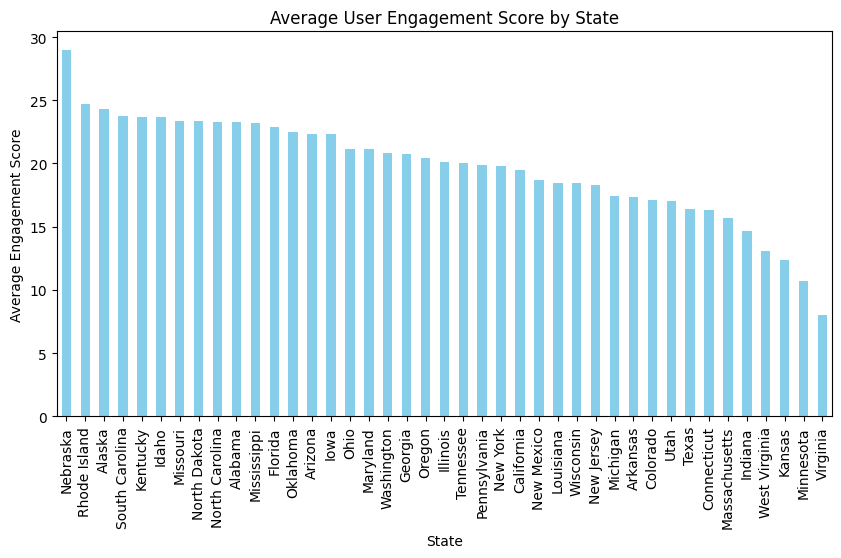

In [13]:
# Visualize the average engagement score by state
plt.figure(figsize=(10, 5))
state_engagement.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average User Engagement Score by State')
plt.xlabel('State')
plt.ylabel('Average Engagement Score')
plt.xticks(rotation=90)
plt.show()

In [14]:
state_engagement

user_state
Alabama           23.250000
Alaska            24.333333
Arizona           22.333333
Arkansas          17.333333
California        19.444444
Colorado          17.111111
Connecticut       16.333333
Florida           22.904762
Georgia           20.777778
Idaho             23.666667
Illinois          20.095238
Indiana           14.666667
Iowa              22.333333
Kansas            12.333333
Kentucky          23.666667
Louisiana         18.466667
Maryland          21.133333
Massachusetts     15.722222
Michigan          17.466667
Minnesota         10.666667
Mississippi       23.222222
Missouri          23.333333
Nebraska          29.000000
New Jersey        18.277778
New Mexico        18.666667
New York          19.811594
North Carolina    23.277778
North Dakota      23.333333
Ohio              21.148148
Oklahoma          22.500000
Oregon            20.444444
Pennsylvania      19.888889
Rhode Island      24.666667
South Carolina    23.777778
Tennessee         20.000000
Texas    

用户参与度数据显示各州之间存在显著的差异，这些差异可能由多种因素造成，包括地区文化、市场策略及经济条件等。

首先，从高参与度的州份来看，Nebraska和Rhode Island展示出了最高的用户参与度，其次是South Carolina、Missouri和North Dakota。这些州的用户表现出高度的活跃性和多样化的音乐探索行为。这可能表明这些地区的用户更倾向于广泛使用音乐平台的服务，他们不仅频繁使用该服务，而且探索了多种不同的音乐曲目。

对于中等参与度的州份，如California、New York和Pennsylvania，虽然这些州拥有较大的用户基数，但其平均参与度得分并没有达到最高水平。这可能反映了这些州的用户群体在使用习惯和音乐品味上的多样性，导致了平均参与度得分的平均化。

另一方面，Virginia、West Virginia和Minnesota的用户参与度相对较低，这可能指示这些地区的用户对音乐平台的使用频率较低，或者他们倾向于较少地探索新的音乐内容。这种低参与度可能是由于地区文化的差异、平台在这些州的市场推广不足，或是经济因素导致的消费能力较低。

综上所述，这些参与度的地区差异表明，音乐播放平台可能需要根据不同地区的特定市场条件和用户特性，制定更加个性化和差异化的营销策略。这不仅能提高用户的总体参与度，还能增强用户的忠诚度和满意度。

# 最早注册用户分析

In [15]:
song_data

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00
...,...,...,...,...,...,...
3995,MKVEXMRJGF,122,Louisiana,2015-05-16,Paperback Writer,2015-06-03 08:26:26
3996,HMBEUWPBQI,76,New York,2015-05-08,Reprise / Day in the Life,2015-06-14 15:46:04
3997,KIYDZUFUJN,68,Florida,2015-05-08,Get Back,2015-06-13 13:13:11
3998,BZNJXQSTTL,138,Alabama,2015-05-17,Help!,2015-06-01 17:01:40


In [16]:
# Find the earliest registered user in each state
earliest_users = song_data.loc[song_data.groupby('user_state')['user_sign_up_date'].idxmin()]

# Select relevant columns
earliest_users = earliest_users[['user_id', 'user_state', 'user_sign_up_date']]

# Print the results
print(earliest_users)

      user_id      user_state user_sign_up_date
100         5         Alabama        2015-05-01
112       106          Alaska        2015-05-12
368       105         Arizona        2015-05-12
257        78        Arkansas        2015-05-08
397        39      California        2015-05-04
118       173        Colorado        2015-05-19
43        127     Connecticut        2015-05-16
57         41         Florida        2015-05-04
146        20         Georgia        2015-05-02
33        165           Idaho        2015-05-19
72         45        Illinois        2015-05-05
175       102         Indiana        2015-05-12
164       178            Iowa        2015-05-19
798       177          Kansas        2015-05-19
37         34        Kentucky        2015-05-04
2398       50       Louisiana        2015-05-06
26         18        Maryland        2015-05-02
91         15   Massachusetts        2015-05-02
90         13        Michigan        2015-05-02
1647        8       Minnesota        201

同样可以查看最后注册的用户的信息：

In [17]:
# Find the earliest registered user in each state
oldest_users = song_data.loc[song_data.groupby('user_state')['user_sign_up_date'].idxmax()]

# Select relevant columns
oldest_users = oldest_users[['user_id', 'user_state', 'user_sign_up_date']]

# Print the results
print(oldest_users)

      user_id      user_state user_sign_up_date
153       148         Alabama        2015-05-18
54        195          Alaska        2015-05-20
368       105         Arizona        2015-05-12
40        124        Arkansas        2015-05-16
49        194      California        2015-05-20
44        181        Colorado        2015-05-20
43        127     Connecticut        2015-05-16
119       189         Florida        2015-05-20
147       183         Georgia        2015-05-20
33        165           Idaho        2015-05-19
7         171        Illinois        2015-05-19
138       146         Indiana        2015-05-18
164       178            Iowa        2015-05-19
798       177          Kansas        2015-05-19
80        169        Kentucky        2015-05-19
41        193       Louisiana        2015-05-20
442        81        Maryland        2015-05-09
1261      191   Massachusetts        2015-05-20
561       157        Michigan        2015-05-19
200       172       Minnesota        201

# 歌曲推荐

**思路一**

统计出来所有歌曲的排名榜单，然后推荐靠前的歌曲：

In [18]:
# 计算每首歌曲的播放次数
song_play_counts = song_data['song_played'].value_counts()

# 获取播放次数最多的前10首歌曲
top_songs = song_play_counts.head(10)

# 定义推荐函数
def recommend_song():
    return top_songs.index.tolist()

# 打印推荐的歌曲
print("推荐的歌曲包括：")
print(recommend_song())

推荐的歌曲包括：
['Come Together', 'Revolution', 'Get Back', 'A Day In The Life', 'Let It Be', 'While My Guitar Gently Weeps', 'Back In the U.S.S.R.', 'Hello Goodbye', 'Here Comes The Sun', 'Hey Jude']


简单来做，就是聚类，基于两个特征，也就是用户的地点和歌曲，然后进行聚类。

**思路二**

基于用户之间的相似性推荐歌曲。

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# 创建用户-歌曲矩阵
user_song_matrix = pd.pivot_table(data=song_data, values='time_played', index='user_id', columns='song_played', aggfunc='count', fill_value=0)

# 计算用户之间的相似度
similarity_matrix = cosine_similarity(user_song_matrix)
similarity_song_data = pd.DataFrame(similarity_matrix, index=user_song_matrix.index, columns=user_song_matrix.index)

# 定义推荐函数
def recommend_song_for_user(user_id, current_song):
    # 找到最相似的用户
    similar_users = similarity_song_data[user_id].sort_values(ascending=False).index[1:2]  # 取得分最高的用户
    similar_user_id = similar_users[0]
    
    # 找出这个用户喜欢但当前用户没有听过的歌曲
    user_songs = set(user_song_matrix.columns[user_song_matrix.loc[user_id] > 0])
    similar_user_songs = set(user_song_matrix.columns[user_song_matrix.loc[similar_user_id] > 0])
    recommended_songs = similar_user_songs - user_songs
    
    if recommended_songs:
        return list(recommended_songs)
    else:
        return "No new songs to recommend based on similar user preferences."

# 测试推荐函数
user_id = 3  # 假设的用户ID
current_song = 'Hey Jude'  # 假设当前正在听的歌曲
recommendations = recommend_song_for_user(user_id, current_song)
print("Recommended songs:", recommendations)

Recommended songs: ['Birthday', 'Wild Honey Pie', 'Got To Get You Into My Life']


**思路三**

使用聚类算法。

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [21]:
song_data['hour_played'] = song_data['time_played'].dt.hour

# 特征编码
state_encoder = LabelEncoder()
song_encoder = LabelEncoder()

song_data['user_state_encoded'] = state_encoder.fit_transform(song_data['user_state'])
song_data['song_played_encoded'] = song_encoder.fit_transform(song_data['song_played'])

# 聚类
features = song_data[['user_state_encoded', 'hour_played', 'song_played_encoded']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(features)
song_data['cluster'] = kmeans.labels_

In [22]:
# 定义推荐函数
def recommend_songs(current_song, user_state, hour_played):
    try:
        current_encoded_song = song_encoder.transform([current_song])[0]
    except ValueError:
        print("This song is not recognized. Returning general recommendations.")
        return song_encoder.classes_[:5]  # 返回一些常见歌曲

    try:
        current_encoded_state = state_encoder.transform([user_state])[0]
    except ValueError:
        print("This state is not recognized. Using a default state.")
        current_encoded_state = state_encoder.transform(['California'])[0]  # 使用默认州

    current_features = [[current_encoded_state, hour_played, current_encoded_song]]
    current_cluster = kmeans.predict(current_features)[0]
    similar_songs = song_data[(song_data['cluster'] == current_cluster) & (song_data['song_played_encoded'] != current_encoded_song)]
    recommended_songs = song_encoder.inverse_transform(similar_songs['song_played_encoded'].unique())
    return recommended_songs[:5]

In [23]:
# 测试推荐函数
recommended_songs = recommend_songs("Come Together", "New York", 14)
print(recommended_songs)

['Back In the U.S.S.R.' 'A Day In The Life'
 'A Saturday Club Xmas/Crimble Medley' 'Birthday' "Don't Let Me Down"]


C:\Users\wangjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# 如何检验推荐模型

设计一个A/B测试来验证推荐模型效果的详细步骤如下：

**设计A/B测试**

**目标**
验证推荐系统是否能够提高用户的播放频率（平均每小时播放次数）。

**步骤**

1. **用户分组**：
   - 将用户随机分成两个组：对照组（Control Group）和实验组（Experiment Group）。
   - 确保两组用户在开始测试前具有统计上的相似性，例如在用户活路程度、历史播放记录等方面。

2. **设置测试条件**：
   - 对照组：不应用任何新的推荐策略。
   - 实验组：实施推荐下一首歌的策略。

3. **测试持续时间**：
   - 确定测试运行的时间长短，以收集足够的数据进行有效分析。通常，这取决于用户的活跃度和数据的变异性，可能需要几周到几个月。

4. **数据收集**：
   - 对每个用户，记录测试期间的总播放次数和总在线时间（小时数）。
   - 计算每个用户的“平均每小时播放次数”。

5. **数据分析**：
   - 使用一尾t检验来比较两组的“平均每小时播放次数”。
   - 零假设（H0）：实验组的“平均每小时播放次数”与对照组相同。
   - 对立假设（H1）：实验组的“平均每小时播放次数”高于对照组。

6. **评估结果**：
   - 根据t检验的p值判断是否拒绝零假设。如果p值小于事先设定的显著性水平（如0.05），则拒绝零假设，认为推荐系统有效。

7. **后续行动**：
   - 如果测试结果显示推荐系统有效，考虑全面部署推荐系统。
   - 如果结果不明显或推荐系统效果不如预期，考虑调整或优化推荐算法。

**注意事项**

- **样本大小**：确保每组的用户数量足够大，以便检测到两组之间的显著差异。
- **测试的隔离性**：确保测试过程中，除了推荐策略之外，两组用户的体验没有其他差异。
- **避免偏见**：确保用户不知道自己处于哪个测试组，以避免心理预期影响测试结果。
- **统计检验的选择**：选择适当的统计方法根据数据的分布和方差同质性来决定。

通过上述方法，你可以有效地评估推荐系统对用户行为的影响，从而做出数据驱动的决策。